In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

[0.0009     0.         0.00051962 0.0006364  0.00069714 0.00073485
 0.00076064 0.00077942 0.00079373 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00091869
 0.00095237 0.00096229 0.00097211 0.00097211 0.00097211 0.00098184
 0.00111535 0.00116576 0.00112383 0.00110408 0.00114673 0.00113842
 0.00117644 0.00121326 0.0012054  0.00108305 0.00102859 0.00101931
 0.00100995 0.00095131 0.00095131 0.00090388 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381
 0.00085381 0.00085381 0.00085381 0.00085381 0.00085381 0.0008

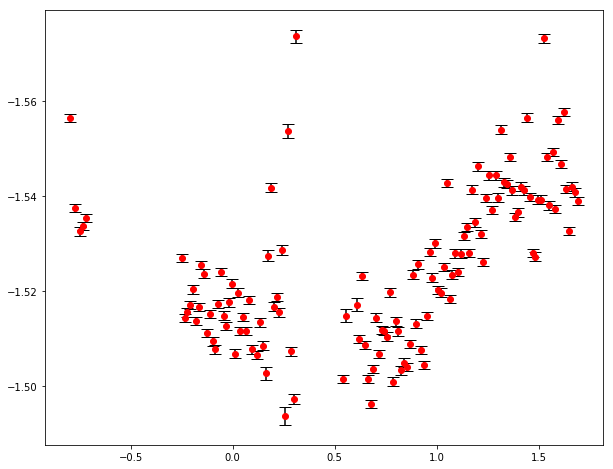

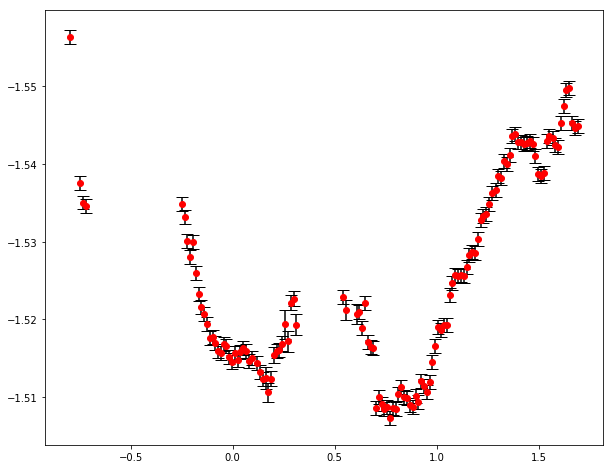

In [120]:
def pull(file):
    x,y,m,dm=np.loadtxt(file,usecols=[3,4,9,10],unpack=True,skiprows=3)
    t=np.loadtxt(file,usecols=1,unpack=True,skiprows=3)
    return t,x,y,m,dm

tt,xt,yt,mt,dmt=pull('lab05phot_target.txt')
tc1,xc1,yc1,mc1,dmc1=pull('lab05phot_comp1.txt')
tc2,xc2,yc2,mc2,dmc2=pull('lab05phot_comp2.txt')

mt_cal=mt-(mc1+mc2)/2.
mt_cal=mt-mc2
#mt_cal=mt-mc1

rolnum=10
'''
mt_cal_movavg=np.append(mt_cal[0],
                        [np.average(mt_cal[1:i]) for i in np.arange(1,rolnum-1,1)])
mt_cal_movavg=np.append(mt_cal_movavg,
                        [np.average(mt_cal[i-(rolnum-1):i]) for i in np.arange(rolnum,len(mt_cal)+1,1)])
'''

a=mt_cal[0]
b=[np.average(mt_cal[1:i]) for i in np.arange(1,rolnum-1,1)]
c=[np.average(mt_cal[i-(rolnum-1):i]) for i in np.arange(rolnum-1,len(mt_cal),1)]
mt_cal_movavg=np.concatenate(([a],b,c))

'''
print np.arange(1,rolnum-1,1)
print np.arange(rolnum-1,len(mt_cal)+1,1)
print len(mt_cal)
'''

d=dmt[0]
e=[np.sqrt(np.sum(dmt[1:i]**2.)/float(i+1)) for i in np.arange(1,rolnum-1,1)]
f=[np.sqrt(np.sum(dmt[i-(rolnum-1):i]**2.)/float(rolnum)) 
   for i in np.arange(rolnum-1,len(mt_cal),1)]
dmt_cal_movavg=np.concatenate(([d],e,f))
print dmt_cal_movavg
print dmt
print mt



fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
#ax.plot(tt,mt_cal)
ax.errorbar(tt,mt_cal,dmt,capsize=6,ecolor='k',fmt='ro')
ax.axes.invert_yaxis()
plt.show()

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
#ax.plot(tt,mt_cal_movavg)
ax.errorbar(tt,mt_cal_movavg,dmt,capsize=6,ecolor='k',fmt='ro')
ax.axes.invert_yaxis()
plt.show()

In [20]:
a=np.array([1,2,3])
b=np.array([0,1,2])
np.average(a,b)

1.5